# Introduction to Convolutionel Neurol Networks and Computer Vision with TensorFlow(Bilgisayarlı Görü)

Computer vission is the practive of writing algorithms which
can discover patterns in visual data.Such as the camera of a self-driving car recogninizing the car in front

## Get the data

The images we're working with are from the Food101 dataset
(101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using
modification notebook

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-06 17:36:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.6MB/s    in 4.1s    

2023-05-06 17:36:22 (25.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
A test directory with the same structure as the train directory.
Example of file structure


pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    


Let's inspect each of the directories we've downloaded.

To so do, we can use the command ls which stands for list.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
from IPython.lib.display import walk
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))# os.listdir("pizza_steak/train/steak")  bir dizindeki tüm adları listelemek için kulanırız

num_steak_images_train

750

To vizualize our images first let's get the class names programmatically

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

# Bu kod bloğu, belirli bir veri seti içerisindeki sınıf isimlerini (class names) elde etmek için kullanılır.

# İlk önce, pathlib modülü kullanılarak data_dir değişkeni oluşturulur ve bu değişken veri setinin yolunu temsil eder.

# Daha sonra, glob() yöntemi kullanılarak data_dir içindeki tüm dosya ve klasörlerin bir listesi oluşturulur. Bu liste item olarak adlandırılır.

# for döngüsü kullanarak, item listesindeki her bir öğe için name özelliği alınır ve sıralanır.

# Son olarak, np.array() yöntemi kullanarak sıralanmış sınıf isimleri bir numpy dizisine dönüştürülür ve class_names değişkenine atanır.

# Kodun son satırında ise, elde edilen sınıf isimleri ekrana yazdırılır.

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import  random

def view_random_image(target_dir,target_class):
  # Setup the ratget directory (we'll view images from here)
  target_folder = target_dir+target_class# terget folder hedef dosya konumu a='pizza_steak/train/' b= 'steak' a + b = pizza_steak/train/steak şeklinde 

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1) # target folder içerisinden 1 öeğeyi seçer ve öğeyi random_image değişkenine atama yapar 
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0]) # img değişkeni, mpimg.imread() yöntemi kullanılarak okunan görüntünün numpy dizisine çevirir.
  plt.imshow(img) # burada ise okuduğumuz görüntüyü imshow ile görseleştiriyoruz array şekilinde gelen görüntüyü görseleştiriyoruz
  plt.title(target_class) # hedef sınıfın ismini yazdırıyoruz
  plt.axis('off') # 'off' parametresi, x ve y eksenlerinin ve etiketlerinin tümünü gizler
  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

# Fonksiyon, target_dir ve target_class parametrelerini kullanarak hedef dizindeki hedef sınıfa ait bir rastgele görüntü seçer. Ardından, seçilen görüntü mpimg.imread() 
# yöntemi kullanılarak okunur ve plt.imshow() yöntemi kullanılarak görselleştirilir. Görüntünün sınıf adı, plt.title() yöntemi kullanılarak eklenir.

# Son olarak, görüntünün boyutu img.shape ile ekrana yazdırılır ve img değişkeni fonksiyondan döndürülür.

# Kodun son satırında, view_random_image() fonksiyonu target_dir ve target_class parametreleri ile çağrılır ve örnek olarak img değişkenine atanır. Bu örnek, eğitim veri setinden rastgele bir görüntüyü gösterir.


Image shape: (512, 512, 3)


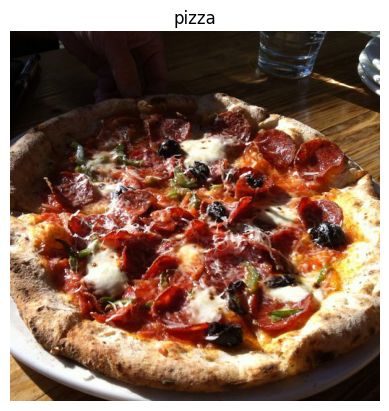

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [10]:
a='pizza_steak/train/'
b= 'steak'
a + b

'pizza_steak/train/steak'

In [11]:
# View the img (actualy jucst a big array/tensor)
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 16,   8,   5],
        [ 16,   8,   5],
        [ 16,   8,   5],
        ...,
        [ 94, 104,  95],
        [ 98, 105,  98],
        [ 96, 103,  96]],

       [[ 16,   8,   5],
        [ 16,   8,   5],
        [ 15,   7,   4],
        ...,
        [ 90, 100,  92],
        [ 89,  96,  89],
        [ 93, 100,  93]],

       [[ 13,   8,   4],
        [ 13,   8,   4],
        [ 13,   8,   4],
        ...,
        [ 92, 102,  94],
        [ 98, 105,  98],
        [ 99, 106,  99]],

       ...,

       [[190, 152, 103],
        [190, 150,  99],
        [198, 158, 107],
        ...,
        [ 14,   4,   3],
        [ 14,   4,   3],
        [ 15,   5,   4]],

       [[187, 149, 100],
        [200, 160, 111],
        [213, 173, 122],
        ...,
        [ 14,   4,   3],
        [ 13,   3,   2],
        [ 13,   3,   4]],

       [[185, 147,  98],
        [211, 173, 124],
        [224, 184, 133],
        ...,
        [ 13,   3,   

In [12]:
# View the image shape
img.shape # returns (width,height,colour channels)

(512, 512, 3)

img değişkeni, mpimg.imread() yöntemi kullanılarak okunan bir görüntünün numpy dizisidir. Bu nedenle, görüntü, her bir pikselin rengini temsil eden sayılardan oluşan bir matristir.

Renkli bir görüntü, her pikselin bir kırmızı, yeşil ve mavi (RGB) bileşeni olduğundan, bir pikselin rengi üç sayıdan oluşan bir vektör olarak ifade edilir. Bu vektörlerin bir araya getirilmesi, üç boyutlu bir matris elde edilir. Siyah-beyaz bir görüntü, yalnızca bir bileşen içerir, bu nedenle bir piksel yalnızca bir sayı ile temsil edilir.

In [13]:
# Get all the pixel values between 0 & 1 
img/255.

array([[[0.0627451 , 0.03137255, 0.01960784],
        [0.0627451 , 0.03137255, 0.01960784],
        [0.0627451 , 0.03137255, 0.01960784],
        ...,
        [0.36862745, 0.40784314, 0.37254902],
        [0.38431373, 0.41176471, 0.38431373],
        [0.37647059, 0.40392157, 0.37647059]],

       [[0.0627451 , 0.03137255, 0.01960784],
        [0.0627451 , 0.03137255, 0.01960784],
        [0.05882353, 0.02745098, 0.01568627],
        ...,
        [0.35294118, 0.39215686, 0.36078431],
        [0.34901961, 0.37647059, 0.34901961],
        [0.36470588, 0.39215686, 0.36470588]],

       [[0.05098039, 0.03137255, 0.01568627],
        [0.05098039, 0.03137255, 0.01568627],
        [0.05098039, 0.03137255, 0.01568627],
        ...,
        [0.36078431, 0.4       , 0.36862745],
        [0.38431373, 0.41176471, 0.38431373],
        [0.38823529, 0.41568627, 0.38823529]],

       ...,

       [[0.74509804, 0.59607843, 0.40392157],
        [0.74509804, 0.58823529, 0.38823529],
        [0.77647059, 0

## An end-to-and example

Let's build a convolutionel neural network to find patterns in

our images more specifically we a need way to

* Load our images

* Preprocess our images

* Build a Cnn to find patterns in our images

* Compile our CNN

* fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)



# verileri train_datagen ile alıyoruz scale edilmiş halde ve train_data değişkenine atama yapıyoruz


# Bu kod, veri ön işleme adımını gerçekleştirir. ImageDataGenerator sınıfı, verileri ölçeklendirme ve diğer ön işleme işlemlerini gerçekleştirmek için kullanılır.

# rescale parametresi, piksel değerlerini 0 ila 1 arasında ölçeklendirmek için kullanılır. Bu, her pikselin orijinal değerini 255'e bölererek yapılır.

# train_datagen değişkeni, eğitim verilerini yüklemek için kullanılacak olan bir ImageDataGenerator nesnesidir.

# valid_datagen değişkeni, doğrulama verilerini yüklemek için kullanılacak olan bir ImageDataGenerator nesnesidir.

# train_dir değişkeni, eğitim verilerinin dosya yolunu belirtir.

# test_dir değişkeni, test verilerinin dosya yolunu belirtir.

# flow_from_directory yöntemi, eğitim verilerini yüklemek için kullanılır. Bu yöntem, belirtilen dizindeki görüntüleri yükler ve yığınlar halinde teslim eder. batch_size parametresi, 
# her yığının kaç öğe içereceğini belirler.

# target_size parametresi, yüklenen görüntülerin yeniden boyutlandırılacağı boyutu belirtir.

# class_mode parametresi, veri kümesinin sınıflandırma yöntemini belirtir. 'binary' değeri, ikili sınıflandırma için kullanılır.

# seed parametresi, rastgele sayı üreteci için bir tohum değeri belirtir.

valid_data = valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, # filitre uyguluyarak resimdeki özelekleri kendi çıkarır
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2) # 2 2 lik bir dönütürme işlemi yaptık yanı fotografın boyutunu 2 2 yaptık
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output




# Model_1, gelen görüntüyü öncelikle 3 kanallı renkli (RGB) bir görüntü olarak alır. Daha sonra, ilk katman olan Conv2D katmanı, görüntüdeki özellikleri öğrenmek 
# için filtreleri kullanır ve bu özelliklerin belirginleştirilmesine yardımcı olur. Ardından, MaxPool2D katmanları, boyutu küçültmek ve görüntüdeki özellikleri belirginleştirmek 
# için kullanılır. Daha sonra, Flatten katmanı, 
# görüntüyü bir vektöre dönüştürür ve ardından Dense katmanı, sınıflandırma yapmak için son bir çıktı üretir. Bu çıktı, 0 ve 1 arasında bir olasılık değeri olarak 


])
# Compile our CNN 
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 148s 3s/step - loss: 0.5381 - accuracy: 0.7260 - val_loss: 0.3780 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 136s 3s/step - loss: 0.4184 - accuracy: 0.8180 - val_loss: 0.3199 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 135s 3s/step - loss: 0.3849 - accuracy: 0.8327 - val_loss: 0.3323 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 146s 3s/step - loss: 0.3681 - accuracy: 0.8473 - val_loss: 0.4506 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 137s 3s/step - loss: 0.3592 - accuracy: 0.8540 - val_loss: 0.3420 - val_accuracy: 0.8560


🤔 Note: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset

In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [16]:
model_1.save('model_1.h5')

## Using the same model as before

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 325ms/step - loss: 0.6549 - accuracy: 0.5953 - val_loss: 0.5924 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 12s 264ms/step - loss: 0.5876 - accuracy: 0.7407 - val_loss: 0.5716 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 15s 319ms/step - loss: 0.5705 - accuracy: 0.7527 - val_loss: 0.5511 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 15s 317ms/step - loss: 0.5534 - accuracy: 0.7600 - val_loss: 0.5442 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 15s 318ms/step - loss: 0.5384 - accuracy: 0.7733 - val_loss: 0.5357 - val_accuracy: 0.7700


In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an axtra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), # dense layers expect a 1-dimensionel 
    tf.keras.layers.Dense(100,activation='relu'),# increase number of neurons from 4 to 100 (for each layer)
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'), # add an extra layer
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 24s 490ms/step - loss: 3.7762 - accuracy: 0.6113 - val_loss: 0.9482 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 22s 458ms/step - loss: 1.0554 - accuracy: 0.6700 - val_loss: 0.6737 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 24s 506ms/step - loss: 0.6190 - accuracy: 0.7627 - val_loss: 0.5755 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6632 - accuracy: 0.7340 - val_loss: 0.5532 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 21s 439ms/step - loss: 0.5476 - accuracy: 0.7700 - val_loss: 0.4887 - val_accuracy: 0.7720


In [19]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary classification: Let's break it down
We just went through a whirlwind of steps:

1-Become one with the data (visualize, visualize, visualize...)

2-Preprocess the data (prepare it for a model)

3-Create a model (start with a baseline)

4-Fit the model

5-Evaluate the model

6-Adjust different parameters and improve model (try to beat your baseline)

7-Repeat until satisfied
Let's step through each.

# 1.Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


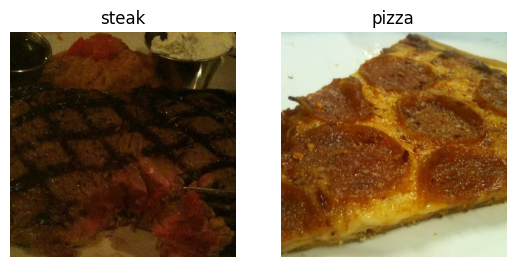

In [21]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

### 2. Preprocess the data (prepare it for a model)

In [22]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data in **batches** (Verilerimiz partiler şeklinde dönüştürmek mesela 20 şerli 20 şerli gruplamak)

bir model aynı anda 32 görüntüye bakabilir yani 10000 görüntünün tümüne bakmak 

yerine veriyi küçük bir alt kümeye bölerek bakar model aynı anda sadece 32 görüntüye bakabilir

Model bunu birkaç sebebden dolayı yapar 

1. Modelin GPU yormadan bitirmeden yapmak isteriz bu yüzden tek seferde 10000 görüntüye değil sadece 32 görüntüye bakar

2. Tek seferde 10.000 görüntüye bakmak modelimizin iyi öğrenememesine sebeb olur 

Why 32 

Because 32 is good for your healt ... 

In [23]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


ImageDataGenerator sınıfı, görüntülerimizi toplu halde hazırlamamıza ve modele yüklenirken üzerlerinde dönüşümler gerçekleştirmemize yardımcı olur.

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Bu kod bloğu, TensorFlow kütüphanesinin keras.preprocessing.image modülünden ImageDataGenerator sınıfını kullanarak veri ön işleme için bir görüntü jeneratörü oluşturuyor.

# train_datagen ve test_datagen değişkenleri sırasıyla eğitim ve test verileri için ayrı ayrı jeneratörlerdir.

# rescale=1/255. parametresi, görüntülerin piksel değerlerini 0-1 arasına ölçeklendirerek modelin daha iyi performans göstermesine yardımcı 
# olur. Bu parametre, tüm piksel değerlerini 255'e böler ve sonuçta oluşan değerleri kullanarak görüntüleri ölçeklendirir.

# Örneğin, bir görüntünün piksel değerleri 0-255 aralığındaysa, bu parametre bu değerleri 0-1 aralığına dönüştürür.

In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,# resimlerimiz klasörlerde olduğu için  flow_from_directory() methodunu kulandık 
                                               target_size=(224,224),# hedef resimlerimizin boyutunu 224 224 olarak değiştirdik (heiht,widht)
                                               class_mode='binary',
                                               batch_size=32)# 32 li parçalara bölüdk çünkü modelimiz aynı anda iyi sonuç vermesi için maximum 32 görüntüye bakabiliyordu
                                               # ve böylece 32 görüntüye aynı anda baktığı içinde GPU fazla zorlamıyoruz
# train_datagen.flow_from_directory Bu yöntem, görüntü dosyalarını NumPy dizilerine dönüştürür ve ardından bu diziler üzerinde çeşitli ön işleme işlemleri yapar.

test_data = test_datagen.flow_from_directory(directory=test_dir,# Test klasörününü içerisindeki tüm resimleri alacak
                                             target_size=(224,224),# Boyutlarını 512,512 den 224,224 dönüştürecek
                                             class_mode='binary',# ikili sınıflandırma için kulanacağımızı belirtiyoruz
                                             batch_size=32)# Resimleri 32 32 şekliden parçalara bölecek 

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

# Bu kod bloğu, eğitim verilerinin bir sonraki kümesini (batch) almak için kullanılır.

# train_data değişkeni, önceden belirlenmiş bir ImageDataGenerator nesnesinden eğitim verilerini içeren bir akış (stream) olabilir.

# train_data.next() yöntemi, bir sonraki batch'in görüntüleri ve etiketlerini içeren bir tuple döndürür.

# images değişkeni, batch içindeki görüntüleri içeren bir NumPy dizisidir.

# labels değişkeni, batch içindeki görüntülere karşılık gelen etiketleri içeren bir NumPy dizisidir.

# len(images) ifadesi, batch içindeki görüntü sayısını verir.

# len(labels) ifadesi, batch içindeki etiket sayısını verir.

# Bu kod bloğu, özellikle büyük veri kümeleri için veri yükünü azaltarak ve modelin eğitimini hızlandırmak için kullanılır. Modelin eğitim 
# verilerini parça parça alarak öğrenmesi, aynı zamanda verilerin daha iyi karıştırılmasını sağlar ve modelin genelleştirme performansını artırabilir.

(32, 32)

Harika, görünüşe göre görsellerimiz ve etiketlerimiz 32'lik gruplar halinde. Resimlerin nasıl göründüğüne bakalım.

In [27]:
# How many batches are there 
len(train_data) # 47 tane 32 parçaya bölünmüş görüntümüz var

47

In [28]:
1500/32

46.875

In [29]:
# get the firs two images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
images[7]

array([[[0.30588236, 0.17254902, 0.227451  ],
        [0.34901962, 0.21960786, 0.25490198],
        [0.4039216 , 0.2784314 , 0.2901961 ],
        ...,
        [0.16470589, 0.02745098, 0.1137255 ],
        [0.16862746, 0.01960784, 0.10980393],
        [0.15686275, 0.00784314, 0.10588236]],

       [[0.28235295, 0.14901961, 0.20392159],
        [0.34117648, 0.21176472, 0.24705884],
        [0.42352945, 0.29803923, 0.30980393],
        ...,
        [0.17254902, 0.02352941, 0.1137255 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16078432, 0.01176471, 0.10980393]],

       [[0.2627451 , 0.13725491, 0.19607845],
        [0.3254902 , 0.20000002, 0.24313727],
        [0.41960788, 0.29803923, 0.31764707],
        ...,
        [0.19215688, 0.04313726, 0.1254902 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16862746, 0.03137255, 0.1254902 ]],

       ...,

       [[0.62352943, 0.5803922 , 0.5568628 ],
        [0.6039216 , 0.56078434, 0.5372549 ],
        [0.6039216 , 0

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

In [32]:
# Make the creating of our model a little easier 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [33]:
# create the model (thiss will be our baseline, a layer convolutional neural network )
model_4 = Sequential([# Giriş katmanı burasıdır 
    Conv2D(filters=10, # filters: Conv katmanındaki filtre sayısıdır. Her filtre, verilen girdi verileri üzerinde farklı özellikleri tanımlayan ağırlıklardan oluşur. yani verdiğimiz rsimlere filtre uygulayarak özelik çıkarır
           kernel_size=3,# kernel_size: Filtre boyutudur. Burada 3x3 boyutunda bir filtrenin kullanılacağı belirtilir.
           strides=1,# Adım boyutudur. Burada 1 olarak belirtilir, bu da filtrenin her adımda bir piksel kaydırarak verileri işleyeceği anlamına gelir.
           padding='valid',# Dolgu türüdür. Burada 'valid' olarak belirtilir, bu da dolgu yapılmayacağı anlamına gelir.
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),# 10: Bu parametre, katmandaki filtre sayısını belirtir # 3: Bu parametre, filtre boyutunu belirtir. Burada, 3x3 boyutunda bir filtre kullanıldığı anlamına gelir.
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')# 2'li sınıflandırma ile çalışan Çıktı katmanı
])

# Yani, bu kodda padding='valid' olarak belirtildiği için, dolgu yapılmayacak ve görüntü 
# kenarlarındaki pikseller işleme dahil edilmeyecektir. Bu da sonuç olarak, çıktı boyutunun, girdi boyutundan daha küçük olacağı anlamına gelir.

#### Ne kadar çok filitremiz olursa modelimiz o kadar kompleks olur yani karmaşık olur

In [34]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

## 4.Fit a model
Our model is compiled, time to fit it.

You'll notice two new parameters here:

* steps_per_epoch - this is the number of batches a model will go through per 
 epoch, in our case, we want our model to go through all batches so it's equal
 to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
 
* validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [35]:
# Check lengths of training and test data generators
len(train_data),len(test_data)

(47, 16)

In [36]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,# This is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),# eğitim veri kümdesindeki toplam adım sayısını yani her adımda 47 defa çalışacak
                        validation_data=test_data,
                        validation_steps=len(test_data))# test veri kümdesindeki adım sayısısıdır

Epoch 1/5
47/47 [==============================] - 161s 3s/step - loss: 0.6909 - accuracy: 0.6580 - val_loss: 0.4778 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 155s 3s/step - loss: 0.4675 - accuracy: 0.7913 - val_loss: 0.4218 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 155s 3s/step - loss: 0.3568 - accuracy: 0.8553 - val_loss: 0.3836 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 155s 3s/step - loss: 0.2124 - accuracy: 0.9380 - val_loss: 0.4115 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 152s 3s/step - loss: 0.0944 - accuracy: 0.9760 - val_loss: 0.5171 - val_accuracy: 0.8000


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 14s 814ms/step - loss: 0.3420 - accuracy: 0.8560


[0.3420211672782898, 0.8560000061988831]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## 5.Evaluate the model

<Axes: >

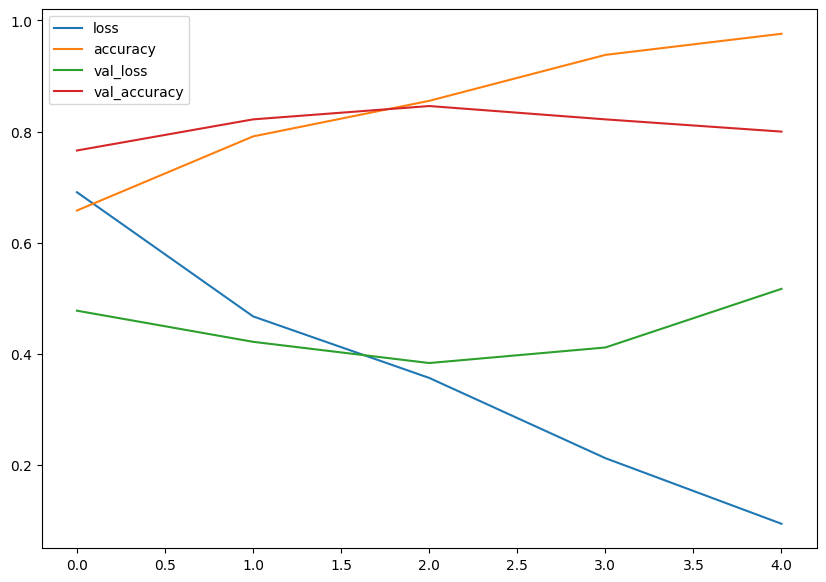

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

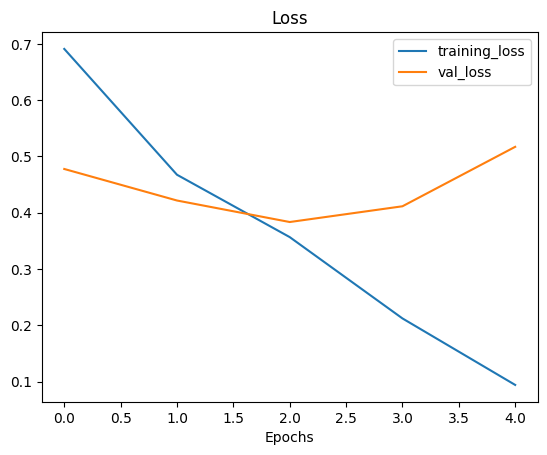

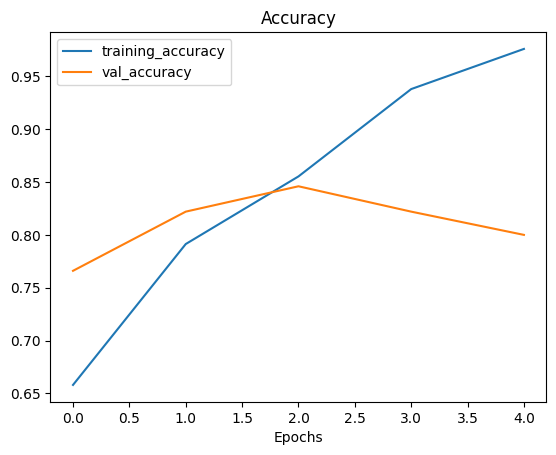

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# 6. Adjust the model parameters MaxPool2D katmanı ile overiftingi önlemek
Fitting a machine learning model comes in 3 steps: 0. Create a basline.

Beat the baseline by overfitting a larger model.
Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.

* Increase the number of convolutional filters.

* Add another dense layer to the output of our flattened layer.
But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

* A ConvNet with max pooling

* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer.

Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer.

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),# reduce of features by half #  Evrişimli katmanlar görüntüden özelik çıkarmak ise  Max Pooling katmanı bu özeliklerin en önemlilerini bulmaktır ve overfiting yapmamızı engel olur 
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation='sigmoid')
])

Woah, we've got another layer type we haven't seen before.

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.6368 - accuracy: 0.6227 - val_loss: 0.4860 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 63s 1s/step - loss: 0.5046 - accuracy: 0.7627 - val_loss: 0.4444 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 63s 1s/step - loss: 0.4592 - accuracy: 0.7960 - val_loss: 0.4522 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 62s 1s/step - loss: 0.4412 - accuracy: 0.8133 - val_loss: 0.3678 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 62s 1s/step - loss: 0.3982 - accuracy: 0.8287 - val_loss: 0.3526 - val_accuracy: 0.8580


In [ ]:
# Check out the model architecture 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

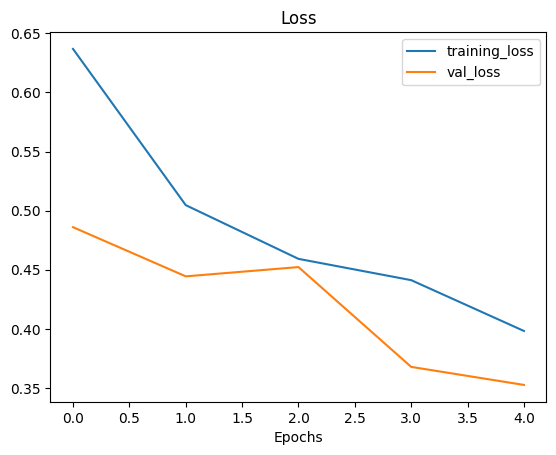

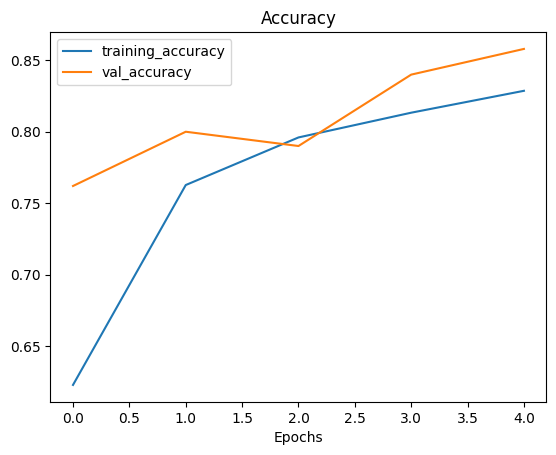

In [ ]:
# Plot loss curves of model_5 result
plot_loss_curves(history_5)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # Görüntüleri rasgele olarak 20 derece döndürür
                                             shear_range=0.2, # Görüntüyü kayarak deforme eder
                                             zoom_range=0.2, # Görüntüyü rasgele bir şekilde yakınlaştırır
                                             width_shift_range=0.2, # görüntüyü yatay yönde resgele kaydırır
                                             height_shift_range=0.2, # Görüntüyü dikey yönde rasgele kaydırır
                                             horizontal_flip=True) # Görüntüyü yatay olarak simetreye göre çevirir
                                             # Bu dönüşümler, orijinal veri setine çeşitlilik ekleyerek modelin genelleştirme yeteneğini artırmaya yardımcı olur.

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 
# Bu nesne, veri setinizi sadece rescale=1/255 dönüşümünü uygulayarak ölçeklendirir. Diğer dönüşümler uygulanmaz. Bu genellikle doğrulama veya test veri setlerini ön işlemek için kullanılır.

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

# Bu kod görünt verilerinin artırılmış bir veri seti oluşturmak için kulanılan bir ImageDataGenerator nesnesi oluşturur görselri ölçeklendirerek (1/255) piksel değerini 0 ile 1 arasına getirir
# rotation_range=20: Görüntüleri rastgele olarak en fazla 20 derece döndürür.
# shear_range=0.2: Görüntüyü kayarak deforme eder.
# zoom_range=0.2: Görüntüyü rastgele bir şekilde yakınlaştırır.
# width_shift_range=0.2: Görüntüyü yatay yönde rastgele kaydırır.
# height_shift_range=0.2: Görüntüyü dikey yönde rastgele kaydırır.
# horizontal_flip=True: Görüntüyü yatay olarak simetriye göre çevirir.
# Bu dönüşümler, orijinal veri setine çeşitlilik ekleyerek modelin genelleştirme yeteneğini artırmaya yardımcı olur.

🤔 Question: What's data augmentation?

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

🔑 Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,# train_data_augmented nesnesi oluşturulur  artırılmış eğitim veri seti yüklenir train_dir eğitim veri setinin dizinini belirtir
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,# train_data nesnesi oluşturulur ve artırılmamış eğitim veri seti yüklenir
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,# test_data nesnesi oluşturulur test_dir parametresi test veri seti parametre setini yükler 
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')
# İlk olarak, train_data_augmented nesnesi oluşturulur ve flow_from_directory işlevi kullanılarak artırılmış eğitim veri seti yüklenir. train_dir parametresi, eğitim veri setinin dizinini belirtir. target_size
# parametresi, görüntülerin hedef boyutunu (224x224 piksel) belirtir. batch_size parametresi, her bir eğitim batch'inin boyutunu belirtir. class_mode='binary' ile ikili sınıflandırma yapıldığı belirtilir.
# shuffle=False ile veri setinin karıştırılmaması sağlanır (bu örnekte sadece gösterim amaçlıdır).

# Aynı şekilde, train_data nesnesi oluşturulur ve artırılmamış eğitim veri seti yüklenir. Bu nesne, veri setini aynı parametrelerle kullanır, ancak artırılmış veri seti yerine orijinal veri setini yükler.

# test_data nesnesi, test_dir parametresiyle test veri setini yükler. Bu veri seti, artırma veya ölçeklendirme gibi dönüşümler uygulanmadan doğrudan yüklenir.

# Her bir nesne oluşturulduktan sonra, flow_from_directory işlevi veri setinin dizininden görüntülerin yüklenmesini ve önceden belirtilen parametrelerin uygulanmasını sağlar.

# Bu kod parçası, veri setlerinin yüklenmesi ve hazırlanması için kullanılır. Oluşturulan veri setleri daha sonra modelin eğitim ve değerlendirme süreçlerinde kullanılabilir.

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

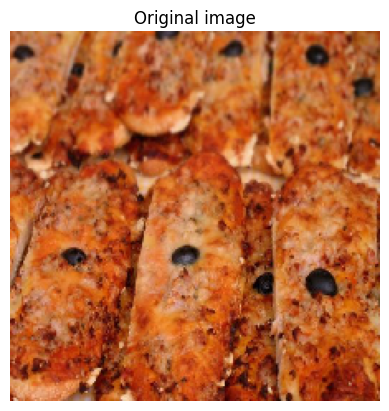

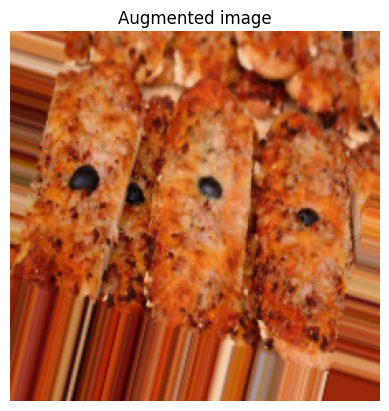

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);